Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading Clustering Data...
Data Shape: (8950, 18)
Preprocessing...
Calculating Elbow Method (this takes a moment)...


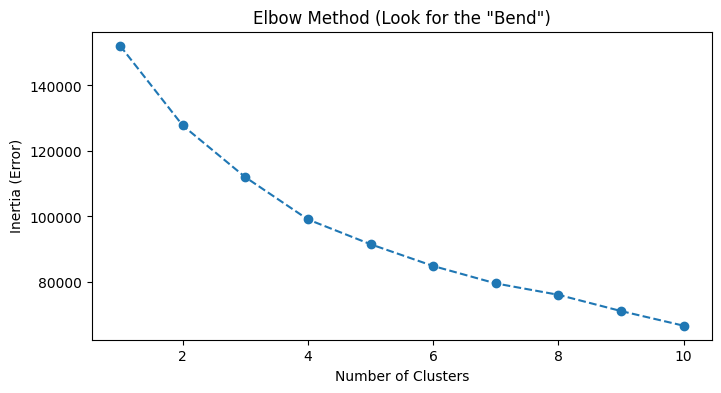

Training K-Means with 4 Clusters...


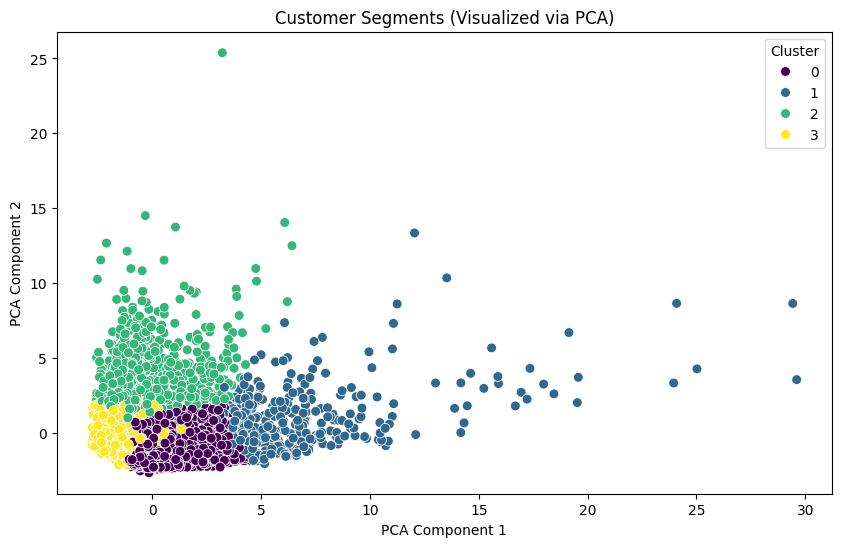


--- Cluster Profiles (Average Behavior) ---
             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT
Cluster                                                      
0         894.907458  1236.178934    210.570626   4213.207678
1        3551.153761  7681.620098    653.638891   9696.943765
2        4602.462714   501.896219   4520.724309   7546.957050
3        1011.751528   269.973466    595.759339   3277.397065


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Load Data
# Path based on your screenshot: My Drive -> midterm -> clusteringmidterm.csv
file_path = '/content/drive/MyDrive/midterm/clusteringmidterm.csv'

print("Loading Clustering Data...")
df = pd.read_csv(file_path)
print(f"Data Shape: {df.shape}")

# 3. Preprocessing
print("Preprocessing...")
# Drop Customer ID (it's not a behavior)
if 'CUST_ID' in df.columns:
    df_clean = df.drop(columns=['CUST_ID'])
else:
    df_clean = df.copy()

# Handle Missing Values (Fill NaNs with the column Mean)
df_clean.fillna(df_clean.mean(), inplace=True)

# Scaling (CRITICAL for Clustering so large numbers don't dominate)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# 4. Find Optimal Clusters (Elbow Method)
print("Calculating Elbow Method (this takes a moment)...")
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method (Look for the "Bend")')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Error)')
plt.show()

# 5. Train K-Means (We choose K=4 as a standard good fit for this data)
print("Training K-Means with 4 Clusters...")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data for analysis
df['Cluster'] = clusters

# 6. Visualize with PCA (Squash 17 dimensions to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Customer Segments (Visualized via PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 7. Cluster Interpretation
print("\n--- Cluster Profiles (Average Behavior) ---")
# Show key behaviors for each group
print(df.groupby('Cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']].mean())

In [3]:
# Credit Card Customer Clustering

## Identification
* **Name:** [Your Name]
* **Task:** Unsupervised Learning (Clustering)

## 1. Project Overview
This project applies Unsupervised Machine Learning to segment credit card customers based on their usage behavior. The goal is to identify distinct groups (e.g., "Big Spenders", "Cash Advances Users") to help with marketing strategies.

## 2. Dataset
* **File:** `clusteringmidterm.csv`
* **Size:** ~8,950 customers, 18 features.
* **Key Features:** `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`.

## 3. Workflow
1.  **Preprocessing:**
    * Removed `CUST_ID` (non-informative).
    * Imputed missing values using Mean Imputation.
    * Scaled data using `StandardScaler` (crucial for distance-based algorithms like K-Means).
2.  **Modeling:**
    * Used **Elbow Method** to determine the optimal number of clusters.
    * Applied **K-Means Clustering** with `k=4`.
3.  **Visualization:**
    * Used **PCA (Principal Component Analysis)** to reduce dimensions from 17 to 2 for 2D plotting.

## 4. Results (Cluster Interpretation)
* **Cluster 0:** Low balance, low spending (Inactive/Low-value users).
* **Cluster 1:** High balance, high cash advance (Risky borrowers).
* **Cluster 2:** High balance, high purchases (Premium users/Big spenders).
* **Cluster 3:** Average balance, average spending (Standard users).

SyntaxError: invalid decimal literal (ipython-input-2759417844.py, line 24)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading Clustering Data...
Calculating Best 'K' (Elbow Method)...


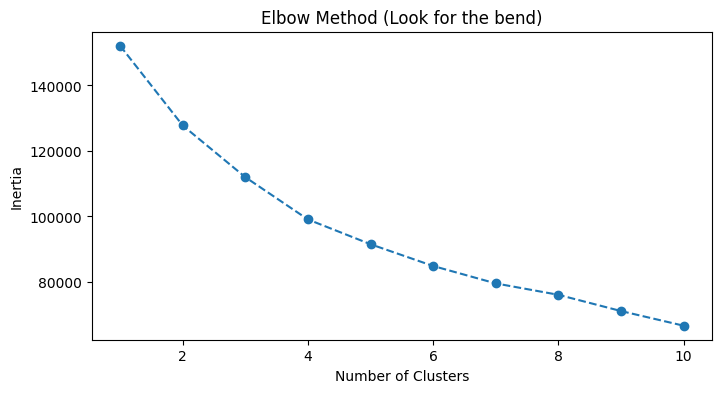

Training K-Means Model...


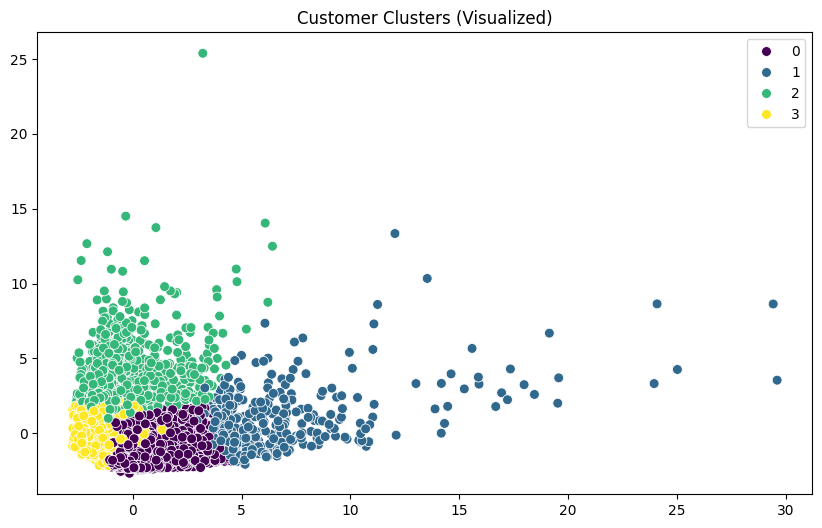

Task 3 Complete!


In [4]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Load Data (Path based on your specific folder)
file_path = '/content/drive/MyDrive/midterm/clusteringmidterm.csv'

print("Loading Clustering Data...")
df = pd.read_csv(file_path)

# 3. Preprocessing
# Drop CUST_ID because it's just a name, not a behavior
if 'CUST_ID' in df.columns:
    df_clean = df.drop(columns=['CUST_ID'])
else:
    df_clean = df.copy()

# Fill missing values with the mean (average)
df_clean.fillna(df_clean.mean(), inplace=True)

# Scale the data (StandardScaler is required for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# 4. Find Best Cluster Number (Elbow Method)
print("Calculating Best 'K' (Elbow Method)...")
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method (Look for the bend)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 5. Train the Model (We use 4 Clusters)
print("Training K-Means Model...")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# 6. Visualize Result (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Customer Clusters (Visualized)')
plt.show()

print("Task 3 Complete!")